#TCS

Number of rows and columns: (3167, 7)
False
             Open
0      269.250000
1      265.000000
2      257.524994
3      252.761993
4      250.000000
...           ...
2687  1902.000000
2688  1871.000000
2689  1820.000000
2690  1819.000000
2691  1854.000000

[2692 rows x 1 columns]
Epoch 1/600
83/83 [==============================] - 1s 14ms/step - loss: 0.0104
Epoch 2/600
83/83 [==============================] - 1s 13ms/step - loss: 5.9946e-04
Epoch 3/600
83/83 [==============================] - 1s 13ms/step - loss: 6.0094e-04
Epoch 4/600
83/83 [==============================] - 1s 13ms/step - loss: 5.7568e-04
Epoch 5/600
83/83 [==============================] - 1s 13ms/step - loss: 5.7063e-04
Epoch 6/600
83/83 [==============================] - 1s 13ms/step - loss: 5.1191e-04
Epoch 7/600
83/83 [==============================] - 1s 13ms/step - loss: 5.0572e-04
Epoch 8/600
83/83 [==============================] - 1s 13ms/step - loss: 5.2212e-04
Epoch 9/600
83/83 [====================

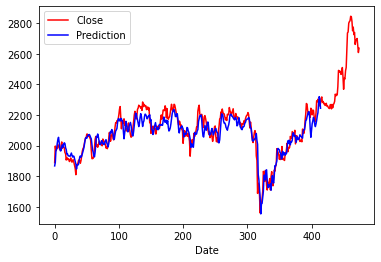

RMSE with LSTM [53.75120369]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TCS.NS.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

df = df.fillna(method="bfill")
print(df.isnull().values.any())


train_set = df.iloc[0:2692:, 1:2]
print(train_set)


sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []

for i in range(60, 2692):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


test_set = df.iloc[2692:, 1:2]
scaled_test = sc.transform(test_set)

inputs = pd.concat((train_set, test_set),axis=0)
scaled_test = inputs[len(inputs)-len(test_set)-60:].values
scaled_test = scaled_test.reshape(-1,1)
scaled_test = sc.transform(scaled_test)

X_test = []
for i in range(60, 475):
    X_test.append(scaled_test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 600, batch_size=32)

real_stock_price = df.iloc[2692:, 1:2].values

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


#Visualizing the prediction
plt.figure()
plt.plot(real_stock_price, color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score
from statsmodels.tools.eval_measures import rmse 


#RMSE for LSTM Model
err_LSTM = rmse(real_stock_price[:-60], predicted_stock_price)
#f1_LSTM = f1_score(real_stock_price[:-60], predicted_stock_price)
#precision_LSTM = precision_score(real_stock_price[:-60], predicted_stock_price)
#recall_LSTM = recall_score(real_stock_price[:-60], predicted_stock_price)
print('RMSE with LSTM', err_LSTM)

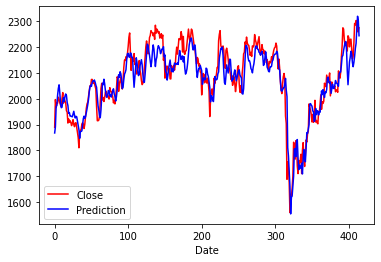

In [2]:
plt.figure()
plt.plot(real_stock_price[:-60], color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error as mae

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("Mean Absolute Error: " + str(mae(real_stock_price[:-60], predicted_stock_price)))
print("Mean Absolute Percentage Error: " + str(mape(real_stock_price[:-60], predicted_stock_price)))


Mean Absolute Error: 41.18338931157757
Mean Absolute Percentage Error: 1.9880900890671893


#DR REDDY

Number of rows and columns: (3167, 7)
False
             Open
0      720.000000
1      720.500000
2      744.000000
3      714.000000
4      709.000000
...           ...
2687  2520.100098
2688  2608.000000
2689  2580.000000
2690  2607.000000
2691  2575.000000

[2692 rows x 1 columns]
Epoch 1/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0135
Epoch 2/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 3/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 4/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 5/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 6/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 7/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0010
Epoch 8/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0010
Epoch 9/600
83/83 [==============================] - 1s 13ms/step -

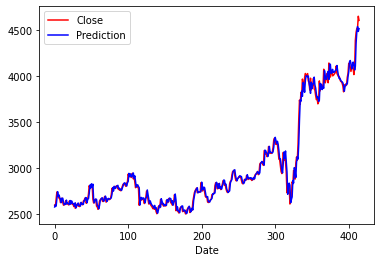

RMSE with LSTM [58.27727756]
Mean Absolute Error: 38.945212494917165
Mean Absolute Percentage Error: 1.2582029714308882


In [9]:
df=pd.read_csv("DRREDDY.NS.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

df = df.fillna(method="bfill")
print(df.isnull().values.any())


train_set = df.iloc[0:2692:, 1:2]
print(train_set)


sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []

for i in range(60, 2692):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


test_set = df.iloc[2692:, 1:2]
scaled_test = sc.transform(test_set)

inputs = pd.concat((train_set, test_set),axis=0)
scaled_test = inputs[len(inputs)-len(test_set)-60:].values
scaled_test = scaled_test.reshape(-1,1)
scaled_test = sc.transform(scaled_test)

X_test = []
for i in range(60, 475):
    X_test.append(scaled_test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 600, batch_size=32)

real_stock_price = df.iloc[2692:, 1:2].values

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


#Visualizing the prediction
plt.figure()
plt.plot(real_stock_price[:-60], color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score
from statsmodels.tools.eval_measures import rmse 


#RMSE for LSTM Model
err_LSTM = rmse(real_stock_price[:-60], predicted_stock_price)
#f1_LSTM = f1_score(real_stock_price[:-60], predicted_stock_price)
#precision_LSTM = precision_score(real_stock_price[:-60], predicted_stock_price)
#recall_LSTM = recall_score(real_stock_price[:-60], predicted_stock_price)
print('RMSE with LSTM', err_LSTM)

from sklearn.metrics import mean_absolute_error as mae

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("Mean Absolute Error: " + str(mae(real_stock_price[:-60], predicted_stock_price)))
print("Mean Absolute Percentage Error: " + str(mape(real_stock_price[:-60], predicted_stock_price)))

#GAIL

Number of rows and columns: (3167, 7)
False
            Open
0     100.509003
1     101.811996
2      99.750000
3     100.688004
4      95.812500
...          ...
2687  169.024994
2688  171.500000
2689  172.500000
2690  173.699997
2691  170.000000

[2692 rows x 1 columns]
Epoch 1/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0116
Epoch 2/600
83/83 [==============================] - 1s 12ms/step - loss: 0.0018
Epoch 3/600
83/83 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 4/600
83/83 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 5/600
83/83 [==============================] - 1s 12ms/step - loss: 0.0016
Epoch 6/600
83/83 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 7/600
83/83 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 8/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 9/600
83/83 [==============================] - 1s 13ms/step - loss: 0.001

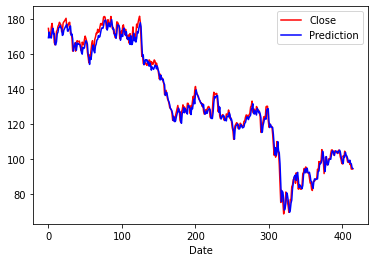

RMSE with LSTM [3.31991922]
Mean Absolute Error: 2.5840412831913584
Mean Absolute Percentage Error: 2.0679517434602173


In [11]:
df=pd.read_csv("GAIL.NS.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

df = df.fillna(method="bfill")
print(df.isnull().values.any())


train_set = df.iloc[0:2692:, 1:2]
print(train_set)


sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []

for i in range(60, 2692):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


test_set = df.iloc[2692:, 1:2]
scaled_test = sc.transform(test_set)

inputs = pd.concat((train_set, test_set),axis=0)
scaled_test = inputs[len(inputs)-len(test_set)-60:].values
scaled_test = scaled_test.reshape(-1,1)
scaled_test = sc.transform(scaled_test)

X_test = []
for i in range(60, 475):
    X_test.append(scaled_test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 600, batch_size=32)

real_stock_price = df.iloc[2692:, 1:2].values

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


#Visualizing the prediction
plt.figure()
plt.plot(real_stock_price[:-60], color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score
from statsmodels.tools.eval_measures import rmse 


#RMSE for LSTM Model
err_LSTM = rmse(real_stock_price[:-60], predicted_stock_price)
#f1_LSTM = f1_score(real_stock_price[:-60], predicted_stock_price)
#precision_LSTM = precision_score(real_stock_price[:-60], predicted_stock_price)
#recall_LSTM = recall_score(real_stock_price[:-60], predicted_stock_price)
print('RMSE with LSTM', err_LSTM)

from sklearn.metrics import mean_absolute_error as mae

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("Mean Absolute Error: " + str(mae(real_stock_price[:-60], predicted_stock_price)))
print("Mean Absolute Percentage Error: " + str(mape(real_stock_price[:-60], predicted_stock_price)))

#HINDU UNILEVER


Number of rows and columns: (3167, 7)
False
             Open
0      213.250000
1      220.000000
2      215.000000
3      217.100006
4      228.899994
...           ...
2687  1701.000000
2688  1690.050049
2689  1692.900024
2690  1678.099976
2691  1738.900024

[2692 rows x 1 columns]
Epoch 1/600
83/83 [==============================] - 1s 13ms/step - loss: 0.0091
Epoch 2/600
83/83 [==============================] - 1s 13ms/step - loss: 4.7160e-04
Epoch 3/600
83/83 [==============================] - 1s 12ms/step - loss: 6.4712e-04
Epoch 4/600
83/83 [==============================] - 1s 12ms/step - loss: 5.0781e-04
Epoch 5/600
83/83 [==============================] - 1s 12ms/step - loss: 4.8756e-04
Epoch 6/600
83/83 [==============================] - 1s 12ms/step - loss: 3.7250e-04
Epoch 7/600
83/83 [==============================] - 1s 12ms/step - loss: 4.3588e-04
Epoch 8/600
83/83 [==============================] - 1s 13ms/step - loss: 4.3851e-04
Epoch 9/600
83/83 [====================

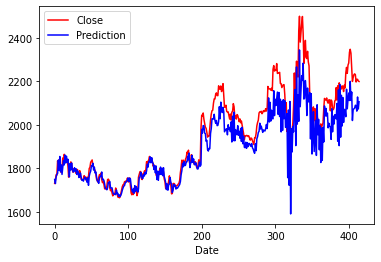

RMSE with LSTM [92.88593714]
Mean Absolute Error: 63.36643358823419
Mean Absolute Percentage Error: 3.0282536200076


In [12]:
df=pd.read_csv("HINDUNILVR.NS.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

df = df.fillna(method="bfill")
print(df.isnull().values.any())


train_set = df.iloc[0:2692:, 1:2]
print(train_set)


sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []

for i in range(60, 2692):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


test_set = df.iloc[2692:, 1:2]
scaled_test = sc.transform(test_set)

inputs = pd.concat((train_set, test_set),axis=0)
scaled_test = inputs[len(inputs)-len(test_set)-60:].values
scaled_test = scaled_test.reshape(-1,1)
scaled_test = sc.transform(scaled_test)

X_test = []
for i in range(60, 475):
    X_test.append(scaled_test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 600, batch_size=32)

real_stock_price = df.iloc[2692:, 1:2].values

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


#Visualizing the prediction
plt.figure()
plt.plot(real_stock_price[:-60], color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score
from statsmodels.tools.eval_measures import rmse 


#RMSE for LSTM Model
err_LSTM = rmse(real_stock_price[:-60], predicted_stock_price)
#f1_LSTM = f1_score(real_stock_price[:-60], predicted_stock_price)
#precision_LSTM = precision_score(real_stock_price[:-60], predicted_stock_price)
#recall_LSTM = recall_score(real_stock_price[:-60], predicted_stock_price)
print('RMSE with LSTM', err_LSTM)

from sklearn.metrics import mean_absolute_error as mae

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("Mean Absolute Error: " + str(mae(real_stock_price[:-60], predicted_stock_price)))
print("Mean Absolute Percentage Error: " + str(mape(real_stock_price[:-60], predicted_stock_price)))